### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Agregamos la columna que indica la tienda
tienda1['tienda'] = 'Tienda_1'
tienda2['tienda'] = 'Tienda_2'
tienda3['tienda'] = 'Tienda_3'
tienda4['tienda'] = 'Tienda_4'

#Unificamos los datos en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4])

df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

#Acontinuacion calcularemos la facturacion total (precio+envio)
df['Facturacion'] = df['Precio'] + df['Costo de envío']

#agrupacion por tienda
facturacion_total = df.groupby('tienda')['Facturacion'].sum().reset_index()
print(facturacion_total)


     tienda   Facturacion
0  Tienda_1  1.212258e+09
1  Tienda_2  1.175829e+09
2  Tienda_3  1.156536e+09
3  Tienda_4  1.093693e+09


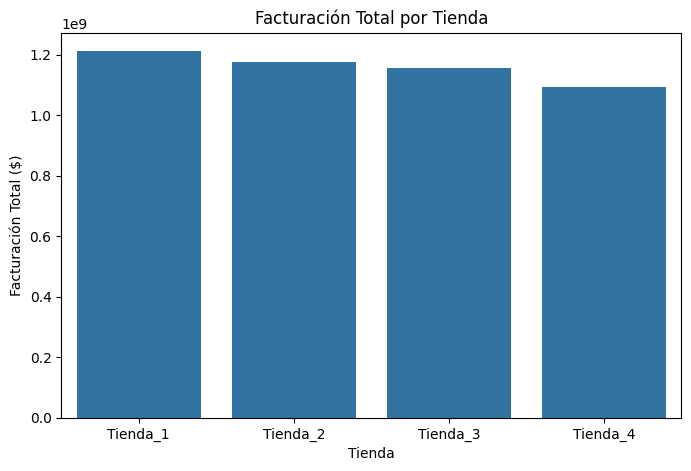

In [3]:
#Grafico de resultados

plt.figure(figsize=(8, 5))
sns.barplot(x='tienda', y='Facturacion', data=facturacion_total)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.show()

# 2. Ventas por categoría

In [4]:
ventas_por_categoria = df.groupby('Categoría del Producto')['Facturacion'].sum().reset_index()

ventas_por_categoria = ventas_por_categoria.sort_values(by='Facturacion', ascending=False)
print(ventas_por_categoria)

    Categoría del Producto   Facturacion
3             Electrónicos  1.749039e+09
2        Electrodomésticos  1.395147e+09
7                  Muebles  7.981114e+08
4   Instrumentos musicales  3.672769e+08
1     Deportes y diversión  1.506693e+08
5                 Juguetes  7.762570e+07
0  Artículos para el hogar  6.069090e+07
6                   Libros  3.975600e+07


/tmp/ipython-input-1726202051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_categoria, x='Facturacion', y='Categoría del Producto', palette='viridis')


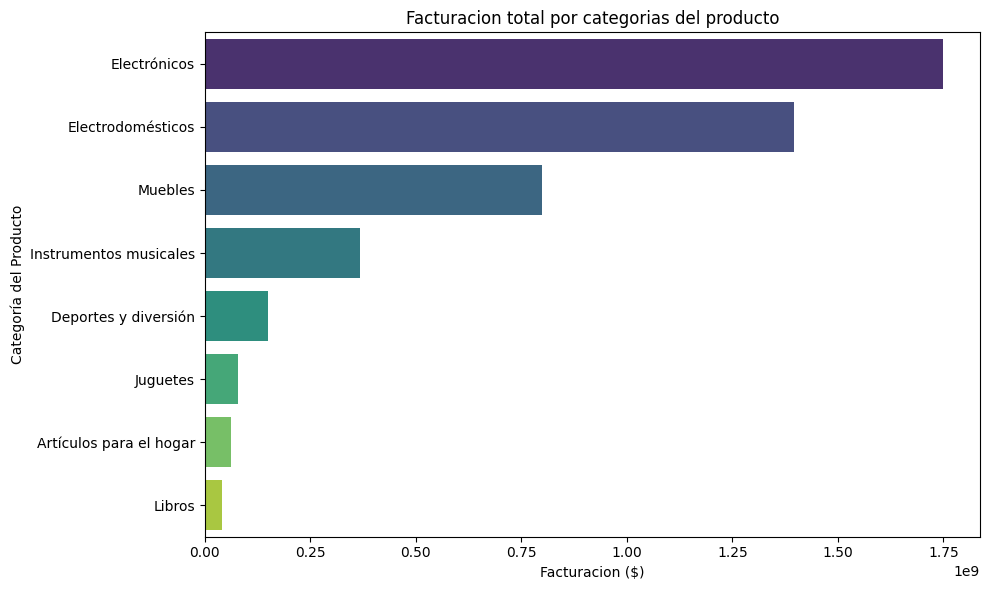

In [5]:
#Graficaremos los resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_categoria, x='Facturacion', y='Categoría del Producto', palette='viridis')
plt.title('Facturacion total por categorias del producto')
plt.xlabel('Facturacion ($)')
plt.ylabel('Categoría del Producto')
plt.tight_layout()
plt.show()

# 3. Envio promedio de la tienda


In [7]:
envio_promedio_por_tienda = df.groupby('tienda')['Costo de envío'].mean().reset_index()
print(envio_promedio_por_tienda)

     tienda  Costo de envío
0  Tienda_1    26018.609580
1  Tienda_2    25216.235693
2  Tienda_3    24805.680373
3  Tienda_4    23459.457167


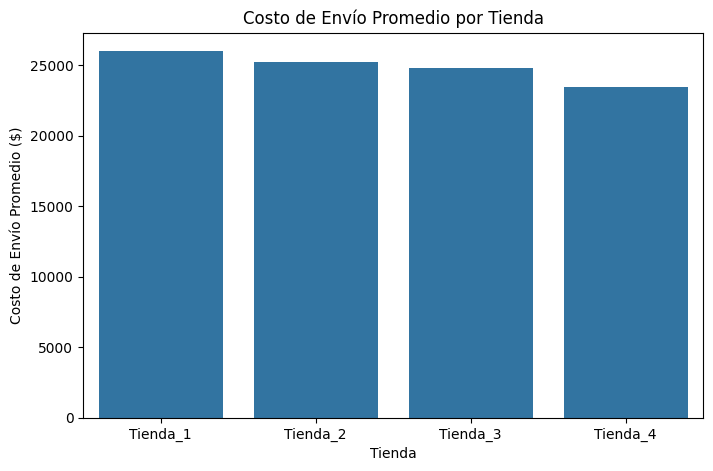

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x='tienda', y='Costo de envío', data=envio_promedio_por_tienda)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.show()

# 4. Productos más y menos vendidos

In [14]:
ventas_por_producto_tienda = df.groupby(['tienda', 'Producto']).size().reset_index(name='Cantidad Vendida')
display(ventas_por_producto_tienda.head())

,tienda,Producto,Cantidad Vendida
0,Tienda_1,Ajedrez de madera,49
1,Tienda_1,Armario,60
2,Tienda_1,Asistente virtual,40
3,Tienda_1,Auriculares,50
4,Tienda_1,Auriculares con micrófono,33


In [46]:
productos_mas_vendidos = ventas_por_producto_tienda.loc[ventas_por_producto_tienda.groupby('tienda')['Cantidad Vendida'].idxmax()]
display(productos_mas_vendidos)

,tienda,Producto,Cantidad Vendida
1,Tienda_1,Armario,60
75,Tienda_2,Iniciando en programación,65
129,Tienda_3,Kit de bancas,57
163,Tienda_4,Cama box,62


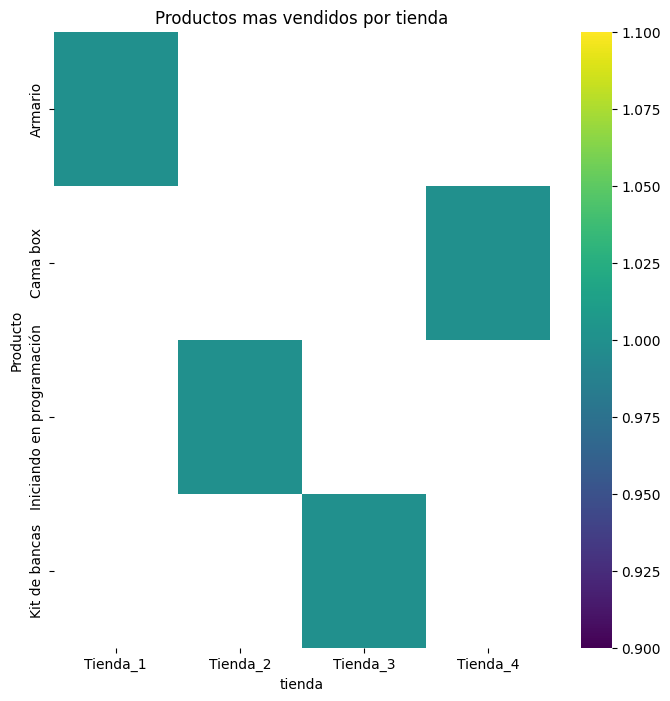

In [48]:
# @title tienda vs Producto

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Producto'].value_counts()
    for x_label, grp in productos_mas_vendidos.groupby('tienda')
})
plt.title('Productos mas vendidos por tienda')
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tienda')
_ = plt.ylabel('Producto')

In [34]:
productos_menos_vendidos = ventas_por_producto_tienda.loc[ventas_por_producto_tienda.groupby('tienda')['Cantidad Vendida'].idxmin()]
display(productos_menos_vendidos)

,tienda,Producto,Cantidad Vendida
4,Tienda_1,Auriculares con micrófono,33
77,Tienda_2,Juego de mesa,32
111,Tienda_3,Bloques de construcción,35
175,Tienda_4,Guitarra eléctrica,33


In [36]:
display(productos_mas_vendidos)
display(productos_menos_vendidos)


,tienda,Producto,Cantidad Vendida
4,Tienda_1,Auriculares con micrófono,33
77,Tienda_2,Juego de mesa,32
111,Tienda_3,Bloques de construcción,35
175,Tienda_4,Guitarra eléctrica,33


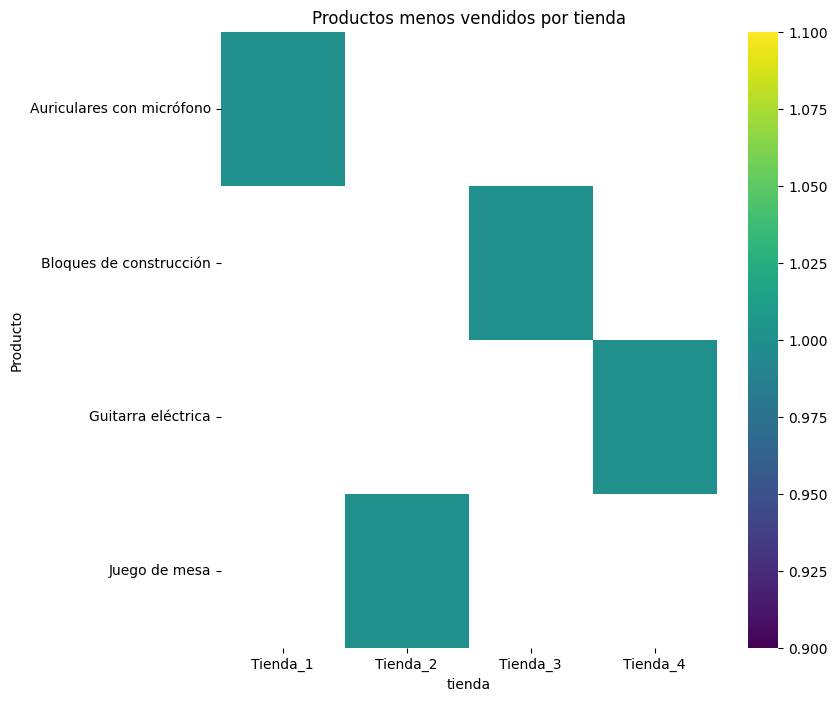

In [45]:
# @title tienda vs Producto

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Producto'].value_counts()
    for x_label, grp in productos_menos_vendidos.groupby('tienda')
})
plt.title('Productos menos vendidos por tienda')
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tienda')
_ = plt.ylabel('Producto')

# 5. Calificacion promedio por tienda

In [50]:
calificacion_promedio_por_tienda = df.groupby('tienda')['Calificación'].mean().reset_index()
print(calificacion_promedio_por_tienda)

     tienda  Calificación
0  Tienda_1      3.976685
1  Tienda_2      4.037304
2  Tienda_3      4.048326
3  Tienda_4      3.995759


In [51]:
calificacion_promedio_por_tienda.round(2)

,tienda,Calificación
0,Tienda_1,3.98
1,Tienda_2,4.04
2,Tienda_3,4.05
3,Tienda_4,4.00


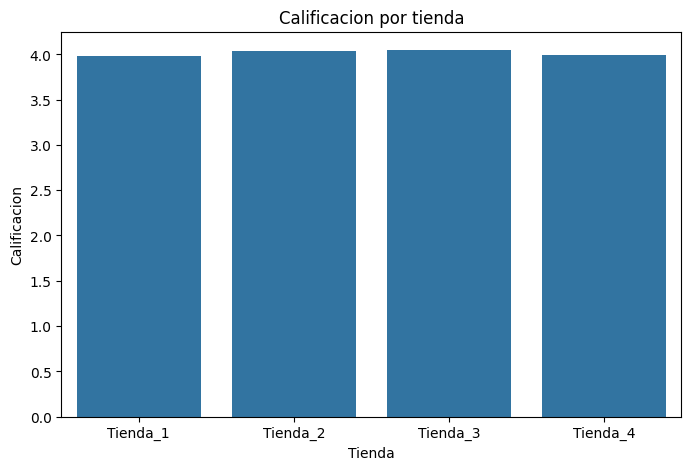

In [52]:
plt.figure(figsize=(8, 5))
sns.barplot(x='tienda', y='Calificación', data=calificacion_promedio_por_tienda)
plt.title('Calificacion por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificacion')
plt.show()

In [53]:
print('La tienda con mejor calificacion es: la tienda3 con una solida calificacion de 4.05/5 ')

La tienda con mejor calificacion es: la tienda3 con una solida calificacion de 4.05/5 


#**Informe**

Segun el analisis de los datos sobre las tiendas de don Juan:
1. La tienda que mas facturacion tiene es la: **Tienda1**
2. La tienda que le genera menos facturacion es la **Tienda4**

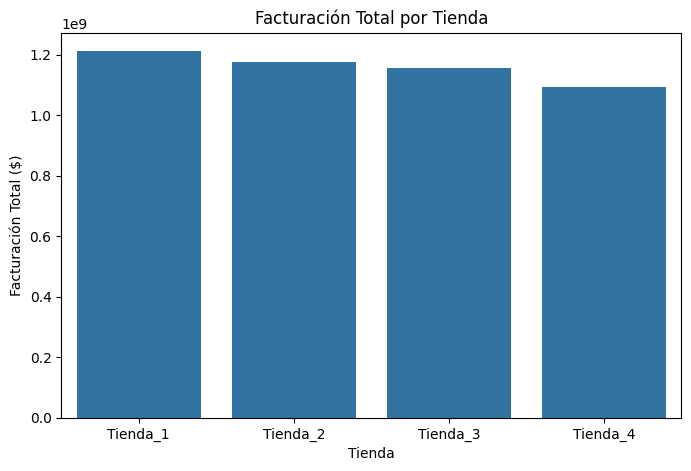

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x='tienda', y='Facturacion', data=facturacion_total)
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.show()

Top 3 de los productos mas vendidos por categoria:
1. Electronicos
2. Electrodomesticos
3. Muebles

/tmp/ipython-input-3011823422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_categoria, x='Facturacion', y='Categoría del Producto', palette='viridis')


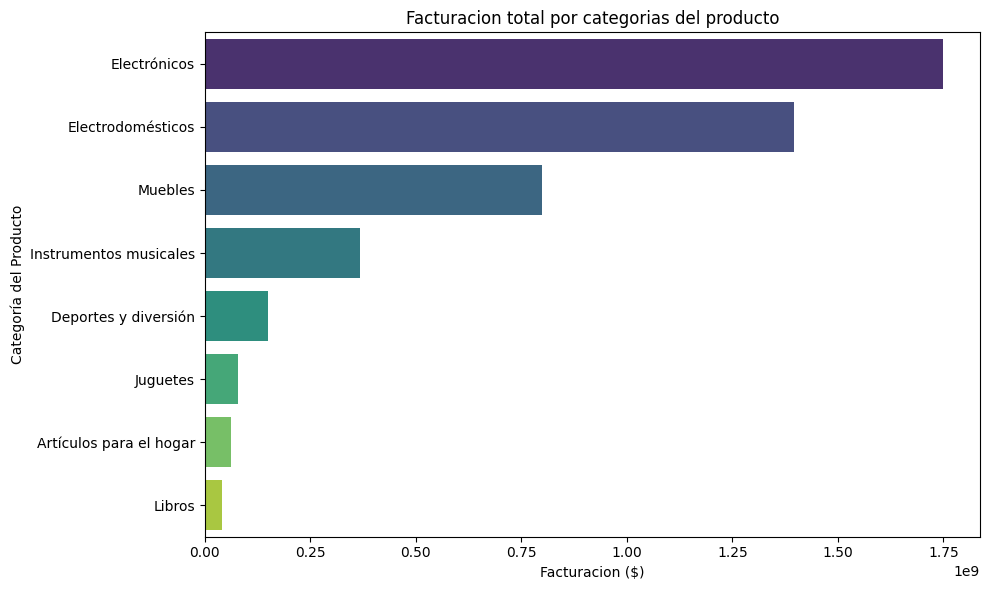

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_categoria, x='Facturacion', y='Categoría del Producto', palette='viridis')
plt.title('Facturacion total por categorias del producto')
plt.xlabel('Facturacion ($)')
plt.ylabel('Categoría del Producto')
plt.tight_layout()
plt.show()

La tienda1 tiene el costo mas elevado del promedio por envio

In [56]:
envio_promedio_por_tienda = df.groupby('tienda')['Costo de envío'].mean().reset_index()
print(envio_promedio_por_tienda)

     tienda  Costo de envío
0  Tienda_1    26018.609580
1  Tienda_2    25216.235693
2  Tienda_3    24805.680373
3  Tienda_4    23459.457167


Productos menos vendidos por cada tienda

In [57]:
productos_menos_vendidos = ventas_por_producto_tienda.loc[ventas_por_producto_tienda.groupby('tienda')['Cantidad Vendida'].idxmin()]
display(productos_menos_vendidos)

,tienda,Producto,Cantidad Vendida
4,Tienda_1,Auriculares con micrófono,33
77,Tienda_2,Juego de mesa,32
111,Tienda_3,Bloques de construcción,35
175,Tienda_4,Guitarra eléctrica,33


Productos mas vendidos por cada tienda

In [58]:
productos_mas_vendidos = ventas_por_producto_tienda.loc[ventas_por_producto_tienda.groupby('tienda')['Cantidad Vendida'].idxmax()]
display(productos_mas_vendidos)

,tienda,Producto,Cantidad Vendida
1,Tienda_1,Armario,60
75,Tienda_2,Iniciando en programación,65
129,Tienda_3,Kit de bancas,57
163,Tienda_4,Cama box,62


Tiendas distribuidas por calificacion

La tienda mejor evaluada es: **La tienda3**

In [59]:
calificacion_promedio_por_tienda.round(2)

,tienda,Calificación
0,Tienda_1,3.98
1,Tienda_2,4.04
2,Tienda_3,4.05
3,Tienda_4,4.00
